In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Let's import built in data from keras
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Let's split the data
(train_images,train_labels),(test_images,test_lables) = mnist.load_data() 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

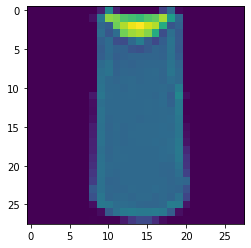

In [4]:
# Let's see the data
import matplotlib.pyplot as plt
plt.imshow(train_images[2])
print(train_images[0])

In [5]:
# Let's scale the model
training_images = train_images/255.0
testing_images = test_images/255.0

In [6]:
model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28,28)),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'softmax')
])

In [7]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
# Let's fit the model
model.fit(training_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4989 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8902


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(testing_images,test_lables)

313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8768


In [10]:
# Let's predict on test images, before that let's convert the logit outputs to probabilities it's easy to interpret
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [11]:
# Let's predict
classifications = probability_model.predict(testing_images)
print(classifications[0])

[0.08556136 0.08556128 0.08556129 0.08556128 0.08556131 0.08572644
 0.08556156 0.08696381 0.08556502 0.22837673]


In [12]:
# Let's create a class of image labels 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
np.argmax(classifications[0])

9

In [14]:
# Let's see what does it represents
print(test_lables[0])

9


Ankle boot


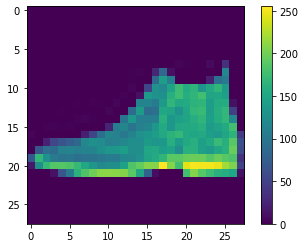

In [15]:
# Let's see what it has predicted
predictions = probability_model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()